# 와인 품질(Quality) 분류 경진대회

- https://dacon.io/competitions/open/235610/overview/description

- 목표 : 와인 품질 분류 머신러닝 모델 개발

## 패키지 Import

데이터과학 기본
- numpy
- pandas

In [2]:
import numpy as np
import pandas as pd

### 데이터 불러오기

1. 다운로드 받은 train.csv 파일의 경로를 입력해서 데이터를 가져와주세요 ! (DATA_DIR)


- 데이터 구조
    - index 구분자
    - quality 품질
    - fixed acidity 산도
    - volatile acidity 휘발성산
    - citric acid 시트르산
    - residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
    - chlorides 염화물
    - free sulfur dioxide 독립 이산화황
    - total sulfur dioxide 총 이산화황
    - density 밀도
    - pH 수소이온농도
    - sulphates 황산염
    - alcohol 도수
    - type 종류

In [8]:
DATA_DIR = 'C:\\Users\82106\Desktop\workspace\Ra-package clone\Ra-package\practice\실습자료\와인품질분류\data'

In [9]:
df_wine = pd.read_csv(f"{DATA_DIR}/train.csv", index_col=0)
df_wine.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


### EDA

시각화
- matplotlib
- seaborn

1. 데이터의 열 별 정보를 확인 (결측치 확인)
2. 변수간 상관관계 확인
3. 변수 별 분포 확인

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


<AxesSubplot:>

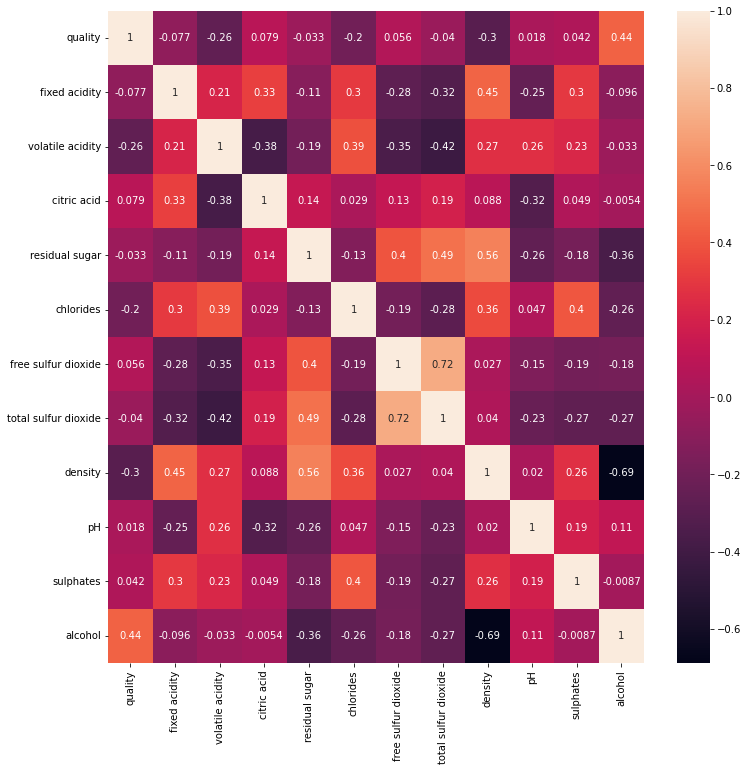

In [12]:
# seaborn의 heatmap함수를 통해 불러온 데이터프레임의 상관계수들을 시각화해주세요 ! 
# 데이터프레임 corr() 메서드
plt.figure(figsize=(12, 12))
sns.heatmap(data=df_wine.corr(), annot=True)

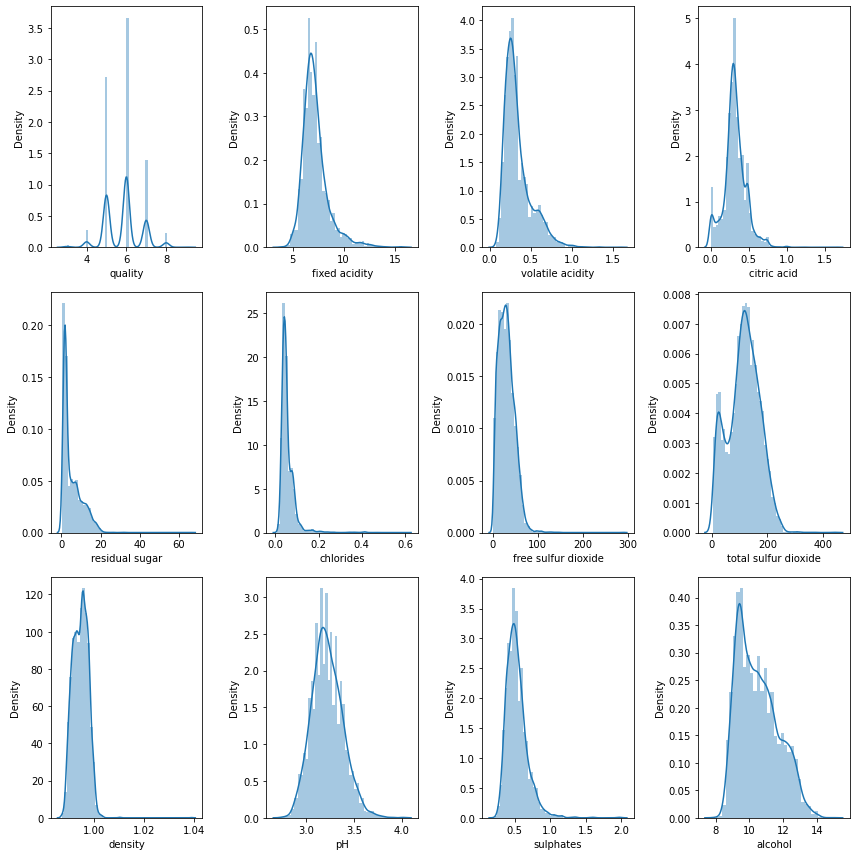

In [13]:
# 각 칼럼별 분포 확인
plt.figure(figsize=(12, 12))
for i in range(12):
    plt.subplot(3, 4, i+1)
    sns.distplot(df_wine.iloc[:, i])
plt.tight_layout()
plt.show()

### 데이터 전처리

1. Scaler
2. 범주형 변수 처리

+ 제출 후, 추가적인 전처리를 해보세요 !

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [15]:
df_wine.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [19]:
sds = StandardScaler()

# 숫자형 칼럼만 넣어주세요 !
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

df_wine_norm = sds.fit_transform(df_wine[numeric_columns])

In [20]:
#한 개씩 꺼내서 보기
enc.fit_transform(df_wine['type'])

array([1, 0, 1, ..., 1, 1, 1])

In [18]:
enc = LabelEncoder()
train_data = np.hstack([df_wine_norm, enc.fit_transform(df_wine['type']).reshape(-1, 1)])

# 위의 scaler와 encoder는 test 데이터셋에도 동일하게 적용해야 합니다.

In [21]:
train_data.shape
#5497, 12

(5497, 12)

### 모델링

1. Logistic Regression (로지스틱 회귀)
2. Decision Tree (의사결정 나무)
3. Random Forest (랜덤포레스트)
4. XGBoost (XGBoost)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb

In [27]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 0)
model_rf = RandomForestClassifier(n_estimators = 8, random_state = 0)
# model_xgb = xgb.XGBClassifier()

### 학습

1. 데이터를 학습, 검증데이터로 분리해주세요 !
2. 학습데이터에서 독립변수와 종속변수와를 구분하고 모델을 학습시켜주세요.
3. 검증데이터로 점수를 확인해보세요 !  
    3-1. 랜덤포레스트, XGBoost는 Feature Importance도 확인해주세요 !
4. 하이퍼파라미터 튜닝을 해보세요.
    - GridSeacrCV

In [23]:
from sklearn.model_selection import train_test_split

In [28]:
# 위에처 전처리한 학습 데이터와 타겟변수를 넣어주세요 !
train_x, valid_x, train_y, valid_y = train_test_split(train_data, df_wine['quality'], 
                                                        test_size=0.2, shuffle=True)

In [30]:
model_lr.fit(train_x, train_y)
model_dt.fit(train_x, train_y)
model_rf.fit(train_x, train_y)
model_xgb.fit(train_x, train_y)

NameError: name 'model_xgb' is not defined

In [ ]:
print('train score : {:.3f}'.format(model_lr.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_lr.score(valid_x, valid_y)))

In [ ]:
print('train score : {:.3f}'.format(model_dt.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_dt.score(valid_x, valid_y)))

In [ ]:
print('train score : {:.3f}'.format(model_rf.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_rf.score(valid_x, valid_y)))

In [ ]:
# print('train score : {:.3f}'.format(model_xgb.score(train_x, train_y)))
# print('test socre : {:.3f}'.format(model_xgb.score(valid_x, valid_y)))

### 추론

- test.csv 파일을 불러와서 독립변수와 종속변수를 분리해주세요 !
- 학습할 떄 사용한 전처리를 해주세요 !
- 학습한 모델을 토대로 Quality를 예측해주세요 !

In [ ]:
df_test = pd.read_csv(f"{DATA_DIR}/test.csv", index_col=0)

df_test_norm = sds.fit_transform(df_test[numeric_columns])
test_data = np.hstack([df_test_norm, enc.fit_transform(df_test['type']).reshape(-1, 1)])

# 여기선 random forest로만 예측합니다. 다른 모델들로도 예측해보세요 !
y_pred = model_rf.predict(test_data)

### 검정

- submission.csv 파일을 불러와 예측한 결과를 quality 열에 넣어주세요 !

In [ ]:
df_submission = pd.read_csv(f"{DATA_DIR}/sample_submission.csv")

In [ ]:
df_submission['quality'] = y_pred

In [ ]:
df_submission.to_csv('my_submission.csv', index=False)

### 제출

- 경진대회 사이트에 제출해주세요 !